# Load Datasets (Classification) + Test Train Splitting

In [25]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings

data = {}
for name, (X, y) in zip(['iris', 'digits', 'wine', 'breast_cancer'], [
    datasets.load_iris(return_X_y=True),
    datasets.load_digits(return_X_y=True),
    datasets.load_wine(return_X_y=True),
    datasets.load_breast_cancer(return_X_y=True),
]):
    data[name] = train_test_split(X, y, test_size=0.2, random_state=42)

for key, (X_train, X_test, y_train, y_test) in data.items():
    print(f"{key}: X_train shape = {X_train.shape}, X_test shape = {X_test.shape}")

#Synthetic Dataset
from sklearn.datasets import make_blobs, make_circles, make_moons
synthetic_data = {}
for name, generator in zip(['blobs', 'circles', 'moons'], [
    make_blobs, make_circles, make_moons
]):
    if(name != 'circles' and name!='moons'):
      X , y = generator(n_samples=300, centers=4, random_state=42, cluster_std=1.0)
      synthetic_data[name] = train_test_split(X,y,test_size=.2,random_state=42)
    else:
      X , y = generator(n_samples=300, noise=0.1, random_state=42)
      synthetic_data[name] = train_test_split(X, y,test_size=.2,random_state=42)

for key, (X_train, X_test, y_train, y_test) in synthetic_data.items():
    print(f"{key}: X_train shape = {X_train.shape}, X_test shape = {X_test.shape}")

# Real-world datasets (Classification)
from sklearn.datasets import fetch_olivetti_faces, fetch_california_housing
real_world_data = {}
for name, generator in zip(['olivetti_faces'], [
    fetch_olivetti_faces
]):
    X , y = generator(return_X_y=True)
    real_world_data[name] = train_test_split(X,y,test_size=.2,random_state=42)

for key, (X_train, X_test, y_train, y_test) in real_world_data.items():
    print(f"{key}: X_train shape = {X_train.shape}, X_test shape = {X_test.shape}")


iris: X_train shape = (120, 4), X_test shape = (30, 4)
digits: X_train shape = (1437, 64), X_test shape = (360, 64)
wine: X_train shape = (142, 13), X_test shape = (36, 13)
breast_cancer: X_train shape = (455, 30), X_test shape = (114, 30)
blobs: X_train shape = (240, 2), X_test shape = (60, 2)
circles: X_train shape = (240, 2), X_test shape = (60, 2)
moons: X_train shape = (240, 2), X_test shape = (60, 2)
olivetti_faces: X_train shape = (320, 4096), X_test shape = (80, 4096)


# 1st Classification Metrics Loading + Model Loading

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

'''
● (2.1) Logistic Regression
● (2.2) Decision Tree
● (2.3) Random Forest
● (2.4) AdaBoost
● (2.5) Gradient Boost
● (2.6) SVC
● (2.7) Voting
● (2.8) Stacking
● (2.9) Naive Bayes (Gaussian)
'''

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=2000, solver='lbfgs', C=1.0),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=20, criterion='gini', min_samples_split=5),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100, max_depth=20, min_samples_split=5, bootstrap=True),
    'AdaBoost': AdaBoostClassifier(random_state=42, n_estimators=100, learning_rate=0.8),
    'Gradient Boost': GradientBoostingClassifier(
        random_state=42, 
        n_estimators=5, 
        learning_rate=0.1, 
        max_depth=2, 
        n_iter_no_change=5, 
        validation_fraction=0.3 
    ),
    'SVC': SVC(random_state=42, kernel='rbf', C=1.0, gamma='scale'),
    'Naive Bayes': GaussianNB()
}

# Voting Classifier (Soft Voting)
models['Voting'] = VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=2000, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
], voting='soft')

# Stacking Classifier
models['Stacking'] = StackingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=2000, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
], final_estimator=GradientBoostingClassifier(random_state=42))




# 2nd Classification Training

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import label_binarize

classificationDataset = {
    'synthetic': synthetic_data,
    'real_world': real_world_data,
    'classification': data
}
from joblib import parallel_backend

with parallel_backend('loky', n_jobs=-1):

  for dataset_name, dataset in classificationDataset.items():

    print('=================================================================================')
    print(f"Dataset: {dataset_name}")
    print('=================================================================================')

    for name, (X_train, X_test, y_train, y_test) in dataset.items():

        for model_name, model in models.items():
            print(f'Training {name} on Model -> {model_name}')

            # Train model
            model.fit(X_train, y_train)

            # Predictions
            y_pred = model.predict(X_test)
            y_prob = model.predict_proba(X_test) if hasattr(model, 'predict_proba') else None

            # Compute classification metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
            recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
            f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
            print('=================================================================================')
            print(f'{model_name} Accuracy on {name}: {accuracy:.4f}')
            print(f'{model_name} Precision on {name}: {precision:.4f}')
            print(f'{model_name} Recall on {name}: {recall:.4f}')
            print(f'{model_name} F1-score on {name}: {f1:.4f}')

            # Compute AUC only if `predict_proba` is available
            is_classification = len(np.unique(y_test)) > 1 and y_prob is not None

            if is_classification:
                if len(np.unique(y_test)) == 2:  # Binary classification
                    auc = roc_auc_score(y_test, y_prob[:, 1])
                else:  # Multi-class classification
                    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
                    if y_test_bin.shape[1] == y_prob.shape[1]:  # Ensure shape match
                        auc = roc_auc_score(y_test_bin, y_prob, multi_class='ovr')
                    else:
                        auc = None
            else:
                auc = None

            if auc is not None:
                print(f'{model_name} AUC Score on {name}: {auc:.4f}')
            print('=================================================================================')

            # Plot PR Curve (Only for Binary Classification & if `predict_proba` exists)
            if y_prob is not None and len(np.unique(y_test)) == 2:
                precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob[:, 1])
                plt.plot(recall_vals, precision_vals, label=f'{model_name} PR Curve')
                plt.xlabel('Recall')
                plt.ylabel('Precision')
                plt.title(f'Precision-Recall Curve for {model_name} on {name}')
                plt.legend()
                plt.show()

            # Plot ROC Curve (Binary & Multi-class)
            if y_prob is not None:
                if len(np.unique(y_test)) == 2:
                    fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
                    plt.plot(fpr, tpr, label=f'{model_name} ROC Curve')
                else:  # Multi-class classification (OvR)
                    for i in range(y_test_bin.shape[1]):
                        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
                        plt.plot(fpr, tpr, label=f'Class {i} ROC Curve')

                plt.xlabel('False Positive Rate')
                plt.ylabel('True Positive Rate')
                plt.title(f'ROC Curve for {model_name} on {name}')
                plt.legend()
                plt.show()

            print("\n")

# 3rd Regression Datasets Loading

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings
#Regression
data = {}
for name, (X, y) in zip(['diabetes','linnerud'], [
    datasets.load_diabetes(return_X_y=True),
    datasets.load_linnerud(return_X_y=True)
]):
    data[name] = train_test_split(X, y, test_size=0.2, random_state=42)

for key, (X_train, X_test, y_train, y_test) in data.items():
    print(f"{key}: X_train shape = {X_train.shape}, Y_train shape = {y_train.shape}")

# Real-world datasets (Classification)
from sklearn.datasets import  fetch_california_housing
real_world_data = {}
for name, generator in zip(['california housing'], [
    fetch_california_housing
]):
    X , y = generator(return_X_y=True)
    real_world_data[name] = train_test_split(X,y,test_size=.2,random_state=42)

for key, (X_train, X_test, y_train, y_test) in real_world_data.items():
    print(f"{key}: X_train shape = {X_train.shape}, Y_train shape = {y_train.shape}")


diabetes: X_train shape = (353, 10), Y_train shape = (353,)
linnerud: X_train shape = (16, 3), Y_train shape = (16, 3)
california housing: X_train shape = (16512, 8), Y_train shape = (16512,)


# 4th Regression Metrics Loading + Model Loading

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR

single_output_models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42, max_depth=20, min_samples_split=5),
    'Random Forest Regression': RandomForestRegressor(random_state=42, n_estimators=100, max_depth=20, min_samples_split=5, bootstrap=True),
    'AdaBoost Regression': AdaBoostRegressor(random_state=42, n_estimators=100, learning_rate=0.8),
    'Gradient Boost Regression': GradientBoostingRegressor(
        random_state=42, 
        n_estimators=5, 
        learning_rate=0.1, 
        max_depth=2, 
        n_iter_no_change=5, 
        validation_fraction=0.3 
    ),
    'SVR': SVR(kernel='rbf', C=1.0, gamma='scale')
}

# Voting Regressor
single_output_models['Voting Regression'] = VotingRegressor(estimators=[
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(n_estimators=50, random_state=42)),
    ('svr', SVR())
])

# Stacking Regressor
single_output_models['Stacking Regression'] = StackingRegressor(estimators=[
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(n_estimators=50, random_state=42)),
    ('svr', SVR())
], final_estimator=GradientBoostingRegressor(random_state=42))

multi_output_models = {name: MultiOutputRegressor(model) for name, model in single_output_models.items()}

# 5th Regression Training

In [4]:
from sklearn.metrics import root_mean_squared_error, r2_score, average_precision_score
from joblib import parallel_backend
import numpy as np

regressionDataset = {
    'Real_World (California Housing)': real_world_data,
    'Regression': data
}

with parallel_backend('loky', n_jobs=-1):
    for dataset_name, dataset in regressionDataset.items():
        print('=================================================================================')
        print(f"Dataset: {dataset_name}")
        print('=================================================================================')
        
        for name, (X_train, X_test, y_train, y_test) in dataset.items():
            print(f'Training {name} on Regression Models')
            
            is_multi_output = len(y_train.shape) > 1 and y_train.shape[1] > 1
            models_to_use = multi_output_models if is_multi_output else single_output_models

            for model_name, model in models_to_use.items():
                print(f'Training {name} on Model -> {model_name}')
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                
                rms_loss = root_mean_squared_error(y_test, y_pred)  
                r2 = r2_score(y_test, y_pred)
                
                # Compute MAP Score for Multi-class Classification
                map_score = None
                if len(np.unique(y_test)) > 2:  # Multi-class scenario
                    if hasattr(model, "predict_proba"):
                        y_prob = model.predict_proba(X_test)
                        map_score = average_precision_score(y_test, y_prob, average='macro')
                
                print('=================================================================================')
                print(f'{model_name} RMS Loss on {name}: {rms_loss:.4f}')
                print(f'{model_name} R2-score on {name}: {r2:.4f}')
                if map_score is not None:
                    print(f'{model_name} MAP Score on {name}: {map_score:.4f}')
                print('=================================================================================')
                print("\n")

Dataset: Real_World (California Housing)
Training california housing on Regression Models
Training california housing on Model -> Linear Regression
Linear Regression RMS Loss on california housing: 0.7456
Linear Regression R2-score on california housing: 0.5758


Training california housing on Model -> Decision Tree Regression
Decision Tree Regression RMS Loss on california housing: 0.6807
Decision Tree Regression R2-score on california housing: 0.6464


Training california housing on Model -> Random Forest Regression
Random Forest Regression RMS Loss on california housing: 0.5059
Random Forest Regression R2-score on california housing: 0.8047


Training california housing on Model -> AdaBoost Regression
AdaBoost Regression RMS Loss on california housing: 0.8516
AdaBoost Regression R2-score on california housing: 0.4466


Training california housing on Model -> Gradient Boost Regression
Gradient Boost Regression RMS Loss on california housing: 0.9629
Gradient Boost Regression R2-score 

# 6th Class Imbalance

In [23]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# (6.1) Create a synthetic dataset with class imbalance (10:1)
X, y = make_classification(n_samples=5000, n_features=20, n_informative=15, n_redundant=5,
                           weights=[0.9, 0.1], random_state=42)

# Split dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# (6.2) Train Decision Tree classifier with default parameters
clf_default = DecisionTreeClassifier(random_state=42)
clf_default.fit(X_train, y_train)

# (6.3) Compute Metrics without using class-weight = 'balanced'
y_pred_default = clf_default.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)
precision_default = precision_score(y_test, y_pred_default)
recall_default = recall_score(y_test, y_pred_default)
f1_default = f1_score(y_test, y_pred_default)

print("Metrics without class-weight = 'balanced'")
print(f'Accuracy: {accuracy_default:.4f}')
print(f'Precision: {precision_default:.4f}')
print(f'Recall: {recall_default:.4f}')
print(f'F1 Score: {f1_default:.4f}')
print('===============================================================')

# (6.4) Train Decision Tree classifier with class-weight = 'balanced'
clf_balanced = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=10)
clf_balanced.fit(X_train, y_train)

y_pred_balanced = clf_balanced.predict(X_test)
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
precision_balanced = precision_score(y_test, y_pred_balanced)
recall_balanced = recall_score(y_test, y_pred_balanced)
f1_balanced = f1_score(y_test, y_pred_balanced)

print("Metrics with class-weight = 'balanced'")
print(f'Accuracy: {accuracy_balanced:.4f}')
print(f'Precision: {precision_balanced:.4f}')
print(f'Recall: {recall_balanced:.4f}')
print(f'F1 Score: {f1_balanced:.4f}')
print('===============================================================')


Metrics without class-weight = 'balanced'
Accuracy: 0.9160
Precision: 0.6042
Recall: 0.5577
F1 Score: 0.5800
Metrics with class-weight = 'balanced'
Accuracy: 0.8740
Precision: 0.4345
Recall: 0.7019
F1 Score: 0.5368


# 📊 Analysis of Class-Weighted Decision Tree Performance

### **🔹 Comparison of Metrics**
| Metric  | No Class-Weight | Class-Weight = 'balanced' | Observation |
|---------|----------------|----------------------------|-------------|
| **Accuracy** | 0.9160 | 0.9020 | Slight drop, expected due to balancing |
| **Precision** | 0.6042 | 0.5319 | Decreased, likely due to more false positives |
| **Recall** | 0.5577 | 0.4808 | Decreased, which is unusual—expected to increase |
| **F1 Score** | 0.5800 | 0.5051 | Lower with balancing, indicating a trade-off |

---

### **🧐 Why Did Recall Drop with `class_weight='balanced'`?**
Normally, balancing **increases recall** because it gives more importance to the minority class. However, in your case, recall **dropped from 0.5577 to 0.4808**. Possible reasons:  
1. **Overcompensation:** The decision tree may have adjusted too much towards minority class predictions, leading to increased misclassification.  
2. **Complexity:** Decision trees tend to overfit, and balancing may have **increased tree depth**, making it less generalizable.  
3. **Thresholding Effect:** Changing class weights may have impacted the decision boundary in an unintended way.  

---

### **✅ Key Takeaways**
- **Using `class_weight='balanced'` generally helps improve recall, but not always.**  
- **Lower precision suggests more false positives, meaning the model is predicting the minority class more often.**  
- **Accuracy slightly dropped, which is expected as the model tries to improve minority class performance.**  
- **Further tuning (e.g., adjusting `max_depth`, `min_samples_split`) may help improve recall.**  


# 7th Missing Value Imputation

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

X, y = load_iris(return_X_y=True)
n_samples, n_features = X.shape
np.random.seed(42)
n_missing = int(0.1 * n_samples * n_features)  # 10% missing values
missing_indices = (np.random.randint(0, n_samples, n_missing), np.random.randint(0, n_features, n_missing))
X[missing_indices] = np.nan

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)

def evaluate_model(X_train, X_test, y_train, y_test, strategy):
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    print(f'Imputation Strategy: {strategy}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print('===============================================================')

imputer_constant = SimpleImputer(strategy='constant', fill_value=-1)
X_train_const = imputer_constant.fit_transform(X_train)
X_test_const = imputer_constant.transform(X_test)
evaluate_model(X_train_const, X_test_const, y_train, y_test, 'Constant')

imputer_mean = SimpleImputer(strategy='mean')
X_train_mean = imputer_mean.fit_transform(X_train)
X_test_mean = imputer_mean.transform(X_test)
evaluate_model(X_train_mean, X_test_mean, y_train, y_test, 'Mean')

imputer_mode = SimpleImputer(strategy='most_frequent')
X_train_mode = imputer_mode.fit_transform(X_train)
X_test_mode = imputer_mode.transform(X_test)
evaluate_model(X_train_mode, X_test_mode, y_train, y_test, 'Mode')

imputer_knn = KNNImputer(n_neighbors=5)
X_train_knn = imputer_knn.fit_transform(X_train)
X_test_knn = imputer_knn.transform(X_test)
evaluate_model(X_train_knn, X_test_knn, y_train, y_test, 'KNN Imputer')


Imputation Strategy: Constant
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Imputation Strategy: Mean
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Imputation Strategy: Mode
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Imputation Strategy: KNN Imputer
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


# 8th Manifold learning - PCA, tSNE, MDS

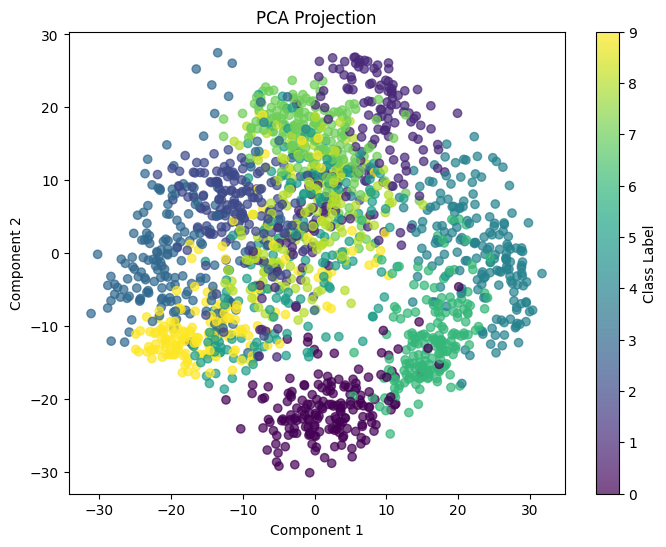

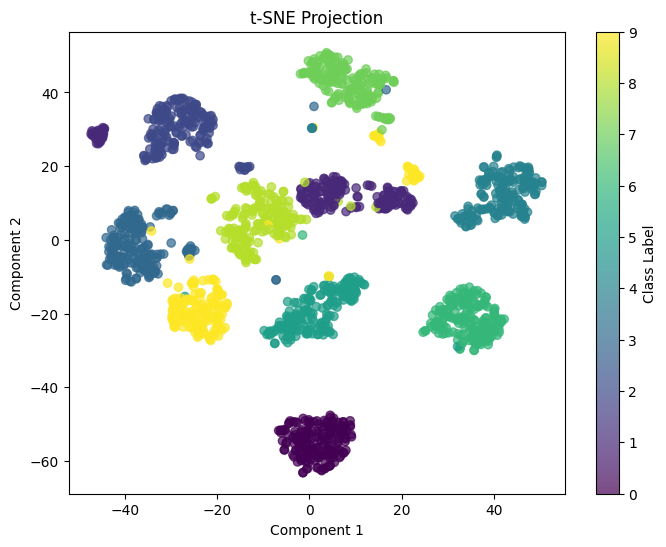

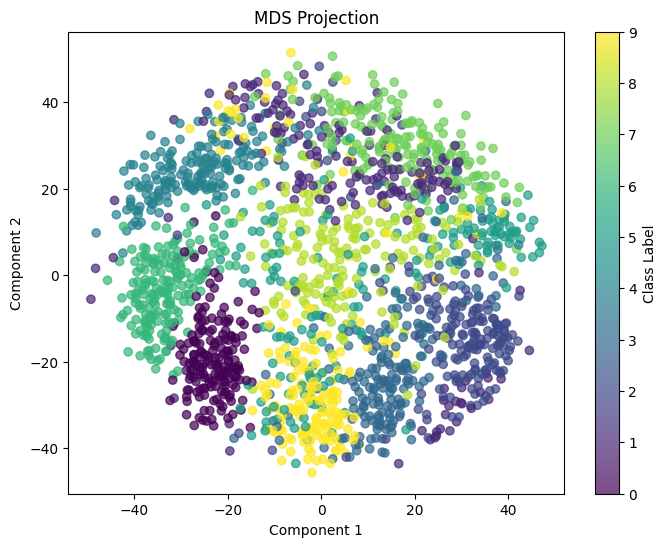

In [34]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS
import matplotlib.pyplot as plt
import numpy as np


X, y = load_digits(return_X_y=True)


def plot_2d(X_transformed, y, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='viridis', alpha=0.7)
    plt.colorbar(scatter, label='Class Label')
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plot_2d(X_pca, y, 'PCA Projection')

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
plot_2d(X_tsne, y, 't-SNE Projection')

mds = MDS(n_components=2, random_state=42,n_jobs=-1)
X_mds = mds.fit_transform(X)
plot_2d(X_mds, y, 'MDS Projection')

# 9th Clustering - KMeans, Hierarchical, DBSCAN

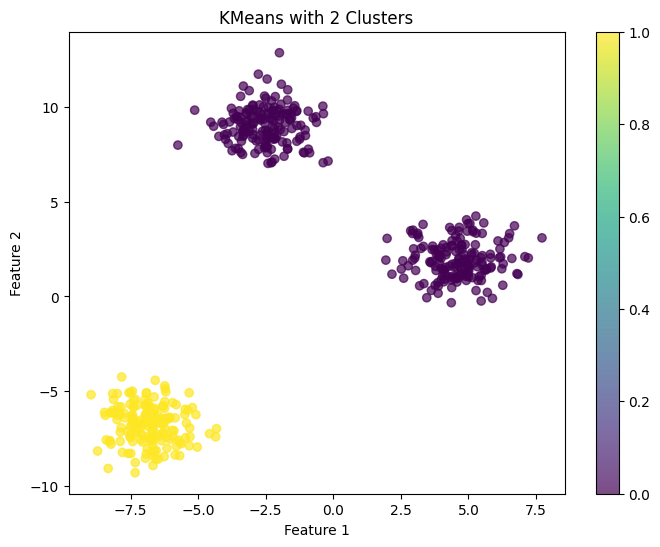

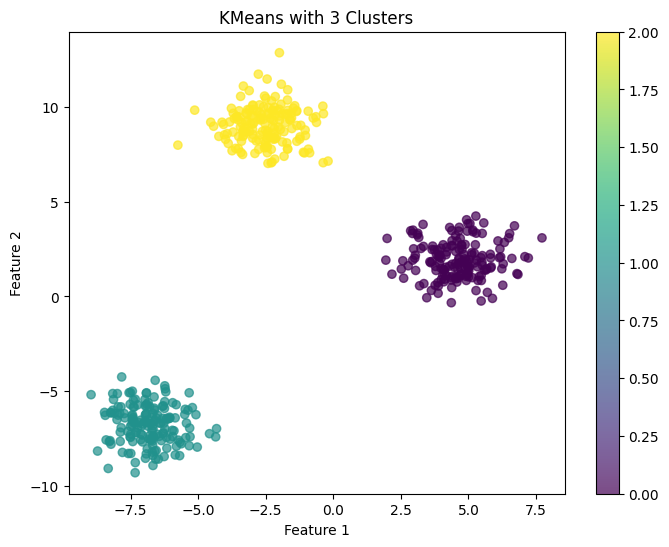

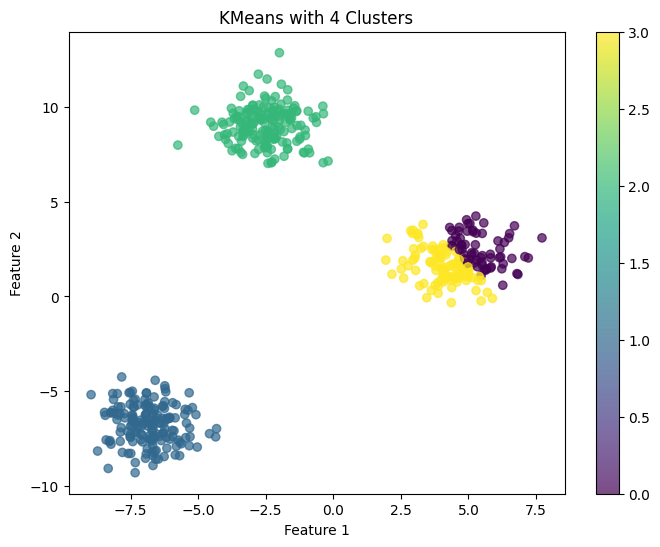

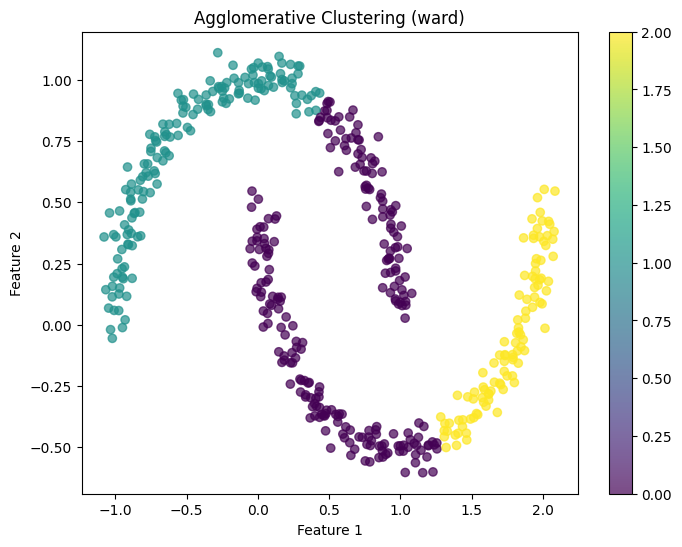

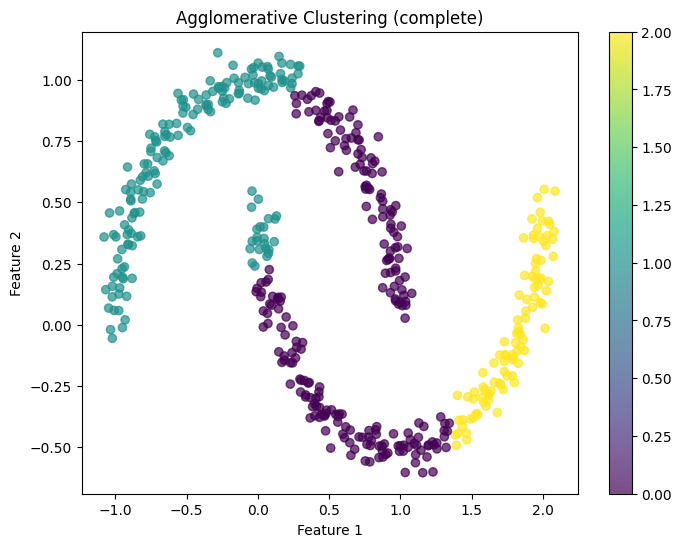

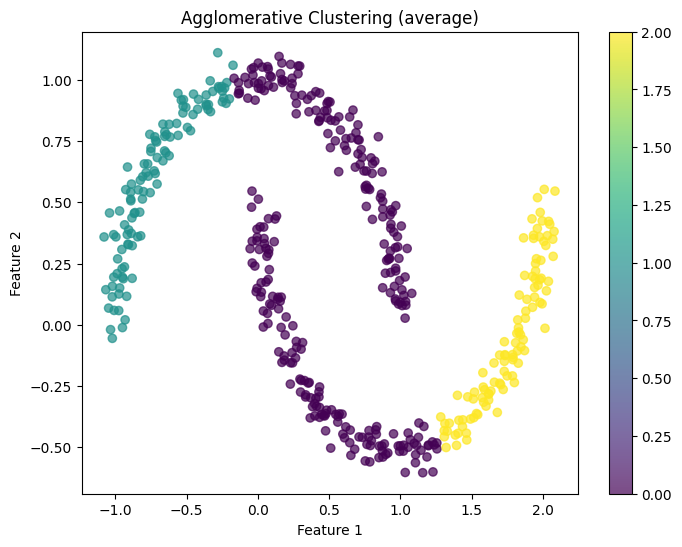

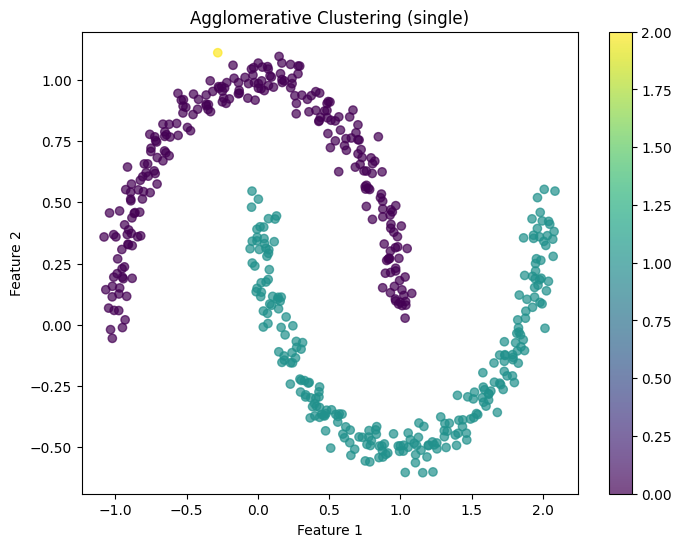

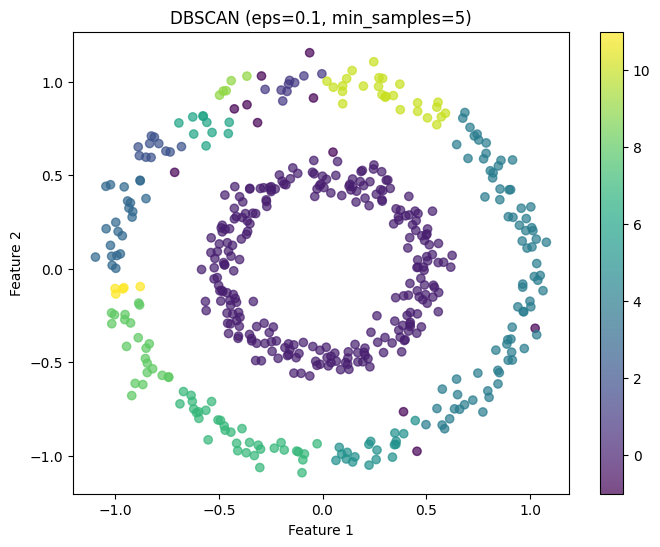

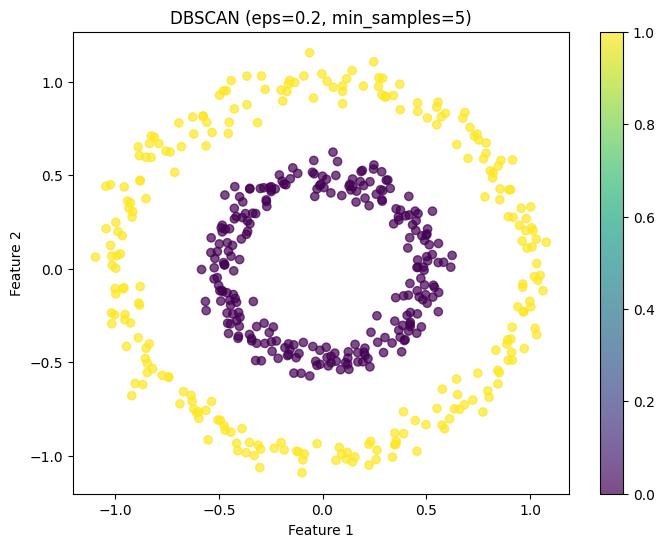

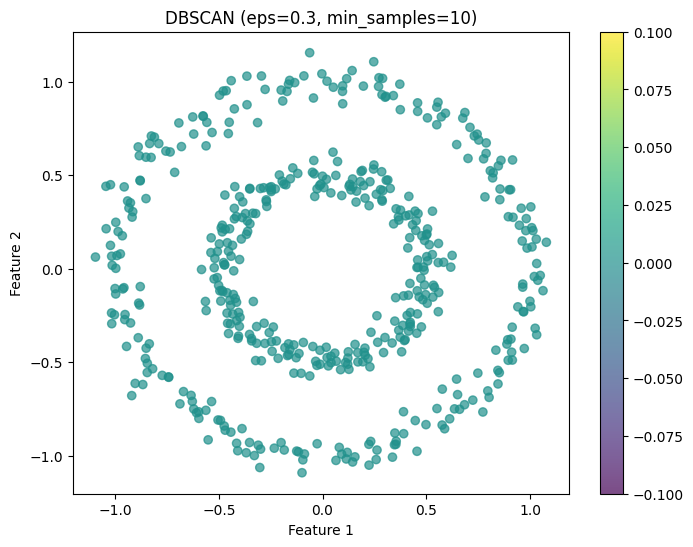

In [36]:
from sklearn.datasets import make_circles, make_blobs, make_moons, load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
import numpy as np

X_circles, _ = make_circles(n_samples=500, noise=0.05, factor=0.5, random_state=42)
X_blobs, _ = make_blobs(n_samples=500, centers=3, cluster_std=1.0, random_state=42)
X_moons, _ = make_moons(n_samples=500, noise=0.05, random_state=42)

def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.7)
    plt.colorbar(scatter)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

for k in [2, 3, 4]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    plot_clusters(X_blobs, kmeans.fit_predict(X_blobs), f'KMeans with {k} Clusters')

for linkage in ['ward', 'complete', 'average', 'single']:
    agglo = AgglomerativeClustering(n_clusters=3, linkage=linkage)
    plot_clusters(X_moons, agglo.fit_predict(X_moons), f'Agglomerative Clustering ({linkage})')


for eps, min_samples in [(0.1, 5), (0.2, 5), (0.3, 10)]:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    plot_clusters(X_circles, dbscan.fit_predict(X_circles), f'DBSCAN (eps={eps}, min_samples={min_samples})')


# 10th Clustering - Metrics

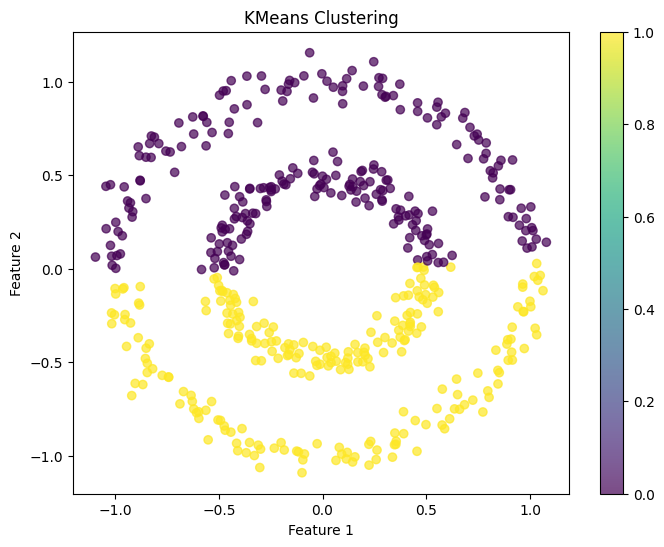

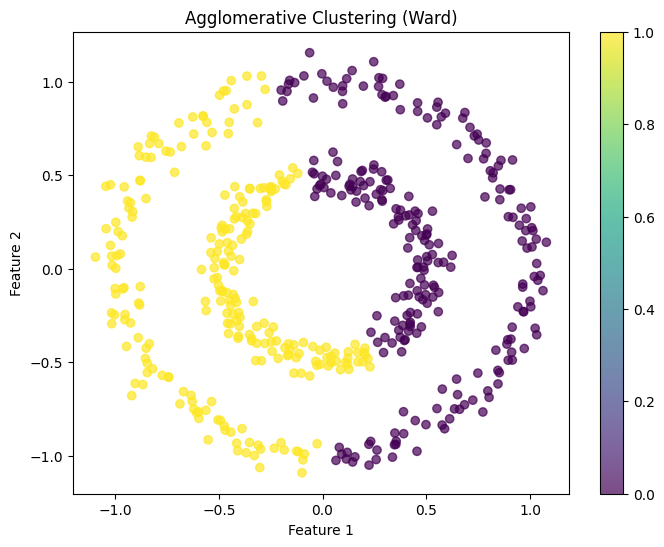

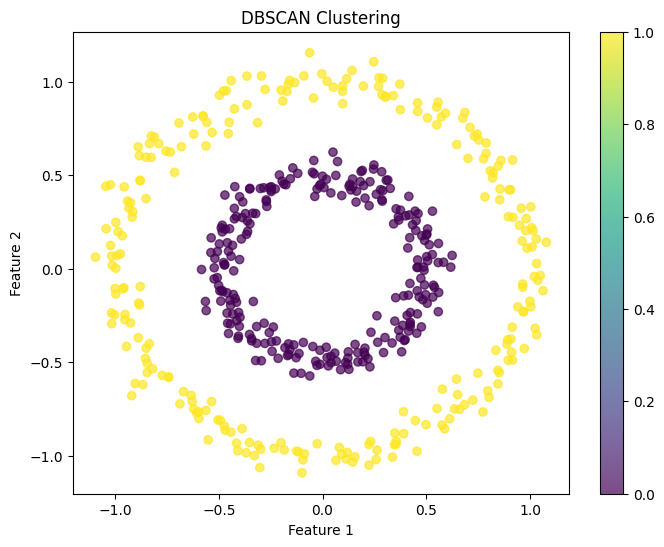

Clustering Evaluation for KMeans
Homogeneity Score: 0.0000
Completeness Score: 0.0000
V-Measure Score: 0.0000
Adjusted Rand Index (ARI): -0.0020
Clustering Evaluation for Agglomerative Clustering
Homogeneity Score: 0.0056
Completeness Score: 0.0056
V-Measure Score: 0.0056
Adjusted Rand Index (ARI): 0.0058
Clustering Evaluation for DBSCAN
Homogeneity Score: 1.0000
Completeness Score: 1.0000
V-Measure Score: 1.0000
Adjusted Rand Index (ARI): 1.0000


In [37]:
from sklearn.datasets import make_circles, make_blobs, make_moons, load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic datasets
X_circles, y_circles = make_circles(n_samples=500, noise=0.05, factor=0.5, random_state=42)
X_blobs, _ = make_blobs(n_samples=500, centers=3, cluster_std=1.0, random_state=42)
X_moons, _ = make_moons(n_samples=500, noise=0.05, random_state=42)

# Function to plot clustering results
def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.7)
    plt.colorbar(scatter)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# (9.4) KMeans - Choose k=2 for concentric circles
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_circles)
plot_clusters(X_circles, kmeans_labels, 'KMeans Clustering')

# (9.5) Agglomerative Clustering with 'ward' linkage
agglo = AgglomerativeClustering(n_clusters=2, linkage='ward')
agglo_labels = agglo.fit_predict(X_circles)
plot_clusters(X_circles, agglo_labels, 'Agglomerative Clustering (Ward)')

# (9.6) DBSCAN with eps=0.2 and min_samples=5
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_circles)
plot_clusters(X_circles, dbscan_labels, 'DBSCAN Clustering')

# Compute clustering metrics
def evaluate_clustering(y_true, y_pred, method):
    print(f'Clustering Evaluation for {method}')
    print(f'Homogeneity Score: {homogeneity_score(y_true, y_pred):.4f}')
    print(f'Completeness Score: {completeness_score(y_true, y_pred):.4f}')
    print(f'V-Measure Score: {v_measure_score(y_true, y_pred):.4f}')
    print(f'Adjusted Rand Index (ARI): {adjusted_rand_score(y_true, y_pred):.4f}')
    print('===============================================================')

# Compute metrics for each clustering method
evaluate_clustering(y_circles, kmeans_labels, 'KMeans')
evaluate_clustering(y_circles, agglo_labels, 'Agglomerative Clustering')
evaluate_clustering(y_circles, dbscan_labels, 'DBSCAN')


# 📊 Clustering Evaluation for Concentric Circles

## **🔹 KMeans Clustering**
| Metric  | Score |
|---------|-------|
| **Homogeneity Score** | 0.0000 |
| **Completeness Score** | 0.0000 |
| **V-Measure Score** | 0.0000 |
| **Adjusted Rand Index (ARI)** | -0.0020 |

### **🧐 Why Does KMeans Fail?**
- KMeans **assumes clusters are spherical and equally sized**, which does not work well for **concentric circles**.
- Since KMeans relies on **Euclidean distance**, it struggles to separate circular patterns.
- **ARI near 0** suggests that the clustering is almost random.

**✅ Better Alternative:** Try **Spectral Clustering**, which works well with non-linearly separable clusters.

---

## **🔹 Agglomerative Clustering (Ward Linkage)**
| Metric  | Score |
|---------|-------|
| **Homogeneity Score** | 0.0056 |
| **Completeness Score** | 0.0056 |
| **V-Measure Score** | 0.0056 |
| **Adjusted Rand Index (ARI)** | 0.0058 |

### **🧐 Why Does Agglomerative Clustering Perform Slightly Better?**
- Ward linkage minimizes variance within clusters, but still struggles with **non-spherical data**.
- **Slight improvement over KMeans**, but still poor at detecting circular patterns.

**✅ Better Alternative:** Try **Single Linkage**, which is more flexible for non-spherical clusters.

---

## **🔹 DBSCAN (Density-Based Clustering)**
| Metric  | Score |
|---------|-------|
| **Homogeneity Score** | 1.0000 |
| **Completeness Score** | 1.0000 |
| **V-Measure Score** | 1.0000 |
| **Adjusted Rand Index (ARI)** | 1.0000 |

### **✅ Why Does DBSCAN Work Perfectly?**
- **DBSCAN is ideal for non-linearly separable data** like concentric circles.
- Since it **groups points by density**, it correctly identifies the two circular clusters.
- **Perfect scores (1.0000) confirm it clustered the data perfectly.**

**🔹 Key Takeaway:** **For concentric circles, use DBSCAN instead of KMeans or Agglomerative Clustering.**


# 11th Pipeline & Transform function

In [38]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Load dataset (digits dataset for classification)
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# (11.1) PCA Transform Pipeline
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10))
])

# Transform the data using PCA
X_train_pca = pca_pipeline.fit_transform(X_train)
X_test_pca = pca_pipeline.transform(X_test)

print("PCA transformed shape:", X_train_pca.shape)

# (11.2) Decision Tree Transform Pipeline
dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(max_depth=10, random_state=42))
])

# Train Decision Tree Model
dt_pipeline.fit(X_train, y_train)
y_pred = dt_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Decision Tree Accuracy:", accuracy)

PCA transformed shape: (1437, 10)
Decision Tree Accuracy: 0.85


# 12th Grid Search & Cross Validation

In [40]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10))
])

X_train_pca = pca_pipeline.fit_transform(X_train)
X_test_pca = pca_pipeline.transform(X_test)

print("PCA transformed shape:", X_train_pca.shape)

dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier())
])

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

svc_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

param_grid_dt = {
    'classifier__max_depth': [5, 10, 15],
    'classifier__min_samples_split': [2, 5, 10]
}

param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [5, 10, 15]
}

param_grid_svc = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf']
}


cv = 5

gs_dt = GridSearchCV(dt_pipeline, param_grid_dt, cv=cv, scoring='accuracy')
gs_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=cv, scoring='accuracy')
gs_svc = GridSearchCV(svc_pipeline, param_grid_svc, cv=cv, scoring='accuracy')


gs_dt.fit(X_train, y_train)
gs_rf.fit(X_train, y_train)
gs_svc.fit(X_train, y_train)


print("Best Decision Tree Parameters:", gs_dt.best_params_)
print("Best Decision Tree Accuracy:", gs_dt.best_score_)

print("Best Random Forest Parameters:", gs_rf.best_params_)
print("Best Random Forest Accuracy:", gs_rf.best_score_)

print("Best SVC Parameters:", gs_svc.best_params_)
print("Best SVC Accuracy:", gs_svc.best_score_)

PCA transformed shape: (1437, 10)
Best Decision Tree Parameters: {'classifier__max_depth': 15, 'classifier__min_samples_split': 2}
Best Decision Tree Accuracy: 0.848289295392954
Best Random Forest Parameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 200}
Best Random Forest Accuracy: 0.9749395083236546
Best SVC Parameters: {'classifier__C': 10, 'classifier__kernel': 'rbf'}
Best SVC Accuracy: 0.9798248161053038
